In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
import re

In [2]:
df = pd.read_csv("D:\\PBL_2\\h1b\\h1b_kaggle.csv\\h1b_kaggle.csv")
df.head()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
0,1,CERTIFIED-WITHDRAWN,UNIVERSITY OF MICHIGAN,BIOCHEMISTS AND BIOPHYSICISTS,POSTDOCTORAL RESEARCH FELLOW,N,36067.0,2016.0,"ANN ARBOR, MICHIGAN",-83.743038,42.280826
1,2,CERTIFIED-WITHDRAWN,"GOODMAN NETWORKS, INC.",CHIEF EXECUTIVES,CHIEF OPERATING OFFICER,Y,242674.0,2016.0,"PLANO, TEXAS",-96.698886,33.019843
2,3,CERTIFIED-WITHDRAWN,"PORTS AMERICA GROUP, INC.",CHIEF EXECUTIVES,CHIEF PROCESS OFFICER,Y,193066.0,2016.0,"JERSEY CITY, NEW JERSEY",-74.077642,40.728158
3,4,CERTIFIED-WITHDRAWN,"GATES CORPORATION, A WHOLLY-OWNED SUBSIDIARY O...",CHIEF EXECUTIVES,"REGIONAL PRESIDEN, AMERICAS",Y,220314.0,2016.0,"DENVER, COLORADO",-104.990251,39.739236
4,5,WITHDRAWN,PEABODY INVESTMENTS CORP.,CHIEF EXECUTIVES,PRESIDENT MONGOLIA AND INDIA,Y,157518.4,2016.0,"ST. LOUIS, MISSOURI",-90.199404,38.627003


In [3]:
df.tail()

,Unnamed: 0,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,lon,lat
3002453,3002454,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"NYC, NEW YORK",-74.005941,40.712784
3002454,3002455,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"SOUTH LAKE, TEXAS",-97.134178,32.941236
3002455,3002456,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"CLINTON, NEW JERSEY",-74.909890,40.636768
3002456,3002457,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"OWINGS MILL, MARYLAND",-76.780253,39.419550
3002457,3002458,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"ALTANTA, GEORGIA",-84.387982,33.748995


In [4]:
df.shape

(3002458, 11)

# UNIVARIATE ANALYSIS

In [5]:
df.dtypes

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
lon                   float64
lat                   float64
dtype: object

In [6]:
df.describe()

,Unnamed: 0,PREVAILING_WAGE,YEAR,lon,lat
count,3.002458e+06,3.002373e+06,3.002445e+06,2.895216e+06,2.895216e+06
mean,1.501230e+06,1.469984e+05,2.013855e+03,-9.213441e+01,3.816054e+01
std,8.667351e+05,5.287609e+06,1.680612e+00,1.965591e+01,4.672835e+00
min,1.000000e+00,0.000000e+00,2.011000e+03,-1.578583e+02,1.343719e+01
25%,7.506152e+05,5.437100e+04,2.012000e+03,-1.119261e+02,3.416536e+01
50%,1.501230e+06,6.502100e+04,2.014000e+03,-8.615862e+01,3.910312e+01
75%,2.251844e+06,8.143200e+04,2.015000e+03,-7.551381e+01,4.088374e+01
max,3.002458e+06,6.997607e+09,2.016000e+03,1.457298e+02,6.483778e+01


In [7]:
df['CASE_STATUS'].value_counts()

CERTIFIED                                             2615623
CERTIFIED-WITHDRAWN                                    202659
DENIED                                                  94346
WITHDRAWN                                               89799
PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED         15
REJECTED                                                    2
INVALIDATED                                                 1
Name: CASE_STATUS, dtype: int64

<AxesSubplot:>

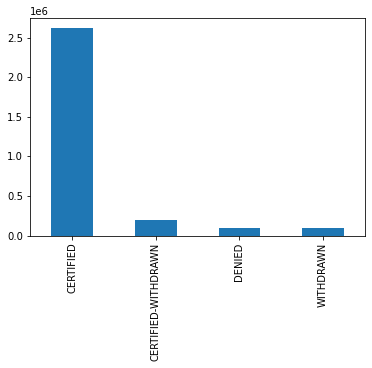

In [8]:
df['CASE_STATUS'].value_counts().loc[lambda x:x>15].plot.bar()

In [9]:
df=df.drop(df[df['CASE_STATUS']=='CERTIFIED-WITHDRAWN'].index)
df=df.drop(df[df['CASE_STATUS']=='WITHDRAWN'].index)
df=df.drop(df[df['CASE_STATUS']=='REJECTED'].index)
df=df.drop(df[df['CASE_STATUS']=='PENDING QUALITY AND COMPLIANCE REVIEW - UNASSIGNED'].index)
df=df.drop(df[df['CASE_STATUS']=='INVALIDATED'].index)

In [10]:
df['CASE_STATUS'].value_counts()

CERTIFIED    2615623
DENIED         94346
Name: CASE_STATUS, dtype: int64

<AxesSubplot:>

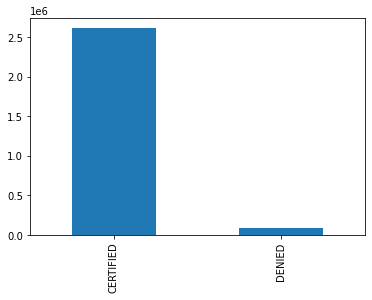

In [11]:
df['CASE_STATUS'].value_counts().plot.bar()

In [12]:
df["EMPLOYER_NAME"].value_counts()

INFOSYS LIMITED                                       130241
TATA CONSULTANCY SERVICES LIMITED                      64358
WIPRO LIMITED                                          43679
DELOITTE CONSULTING LLP                                36667
ACCENTURE LLP                                          32983
                                                       ...  
JJ & R CHIROPRACTIC P. C.                                  1
ALLARD ENGINEERING, INC.                                   1
NOVELLUS SYSTEMS, INC., A WHOLLYOWNED SUBSIDIARY O         1
JBCCONNECT CA LLC                                          1
MOGO INC.                                                  1
Name: EMPLOYER_NAME, Length: 231603, dtype: int64

In [13]:
Pie=df["EMPLOYER_NAME"].value_counts().to_frame()[:30]
Pie.reset_index(inplace=True)
Pie.columns = ["EMPLOYER_NAME","No. OF APPLICANTS"]
print(Pie)

                                      EMPLOYER_NAME  No. OF APPLICANTS
0                                   INFOSYS LIMITED             130241
1                 TATA CONSULTANCY SERVICES LIMITED              64358
2                                     WIPRO LIMITED              43679
3                           DELOITTE CONSULTING LLP              36667
4                                     ACCENTURE LLP              32983
5                         IBM INDIA PRIVATE LIMITED              28166
6                             MICROSOFT CORPORATION              22373
7                                 HCL AMERICA, INC.              22330
8                            ERNST & YOUNG U.S. LLP              18217
9                  LARSEN & TOUBRO INFOTECH LIMITED              16724
10                            CAPGEMINI AMERICA INC              16032
11  COGNIZANT TECHNOLOGY SOLUTIONS U.S. CORPORATION              15448
12                                      GOOGLE INC.              12545
13    

<AxesSubplot:xlabel='EMPLOYER_NAME'>

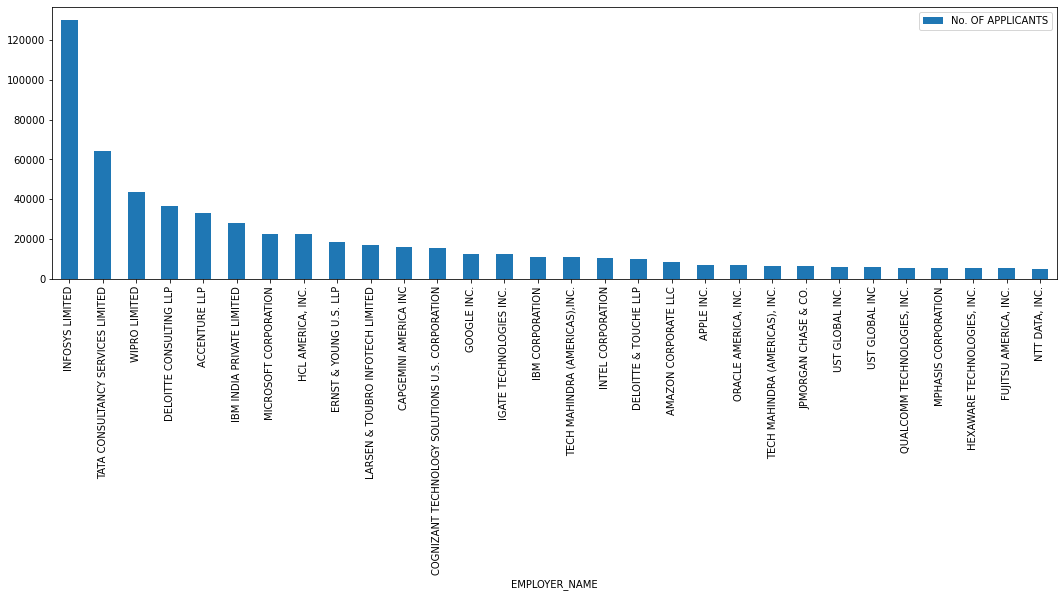

In [14]:
Pie.plot(kind='bar',x='EMPLOYER_NAME',y='No. OF APPLICANTS',figsize=(18,5))

In [15]:
Pie=df["SOC_NAME"].value_counts().to_frame()[:20]
Pie.reset_index(inplace=True)
Pie.columns = ["SOC_NAME","No. OF APPLICANTS"]
print(Pie)

                                             SOC_NAME  No. OF APPLICANTS
0                           Computer Systems Analysts             271368
1                                Computer Programmers             205977
2                   SOFTWARE DEVELOPERS, APPLICATIONS             197937
3                           COMPUTER SYSTEMS ANALYSTS             197932
4                   Software Developers, Applications             174187
5                                COMPUTER PROGRAMMERS             154598
6                     COMPUTER OCCUPATIONS, ALL OTHER              99767
7                     Computer Occupations, All Other              64892
8               Software Developers, Systems Software              40544
9                                 Management Analysts              35876
10              SOFTWARE DEVELOPERS, SYSTEMS SOFTWARE              35262
11                                 Financial Analysts              30073
12                           Accountants and Audito

<AxesSubplot:xlabel='SOC_NAME'>

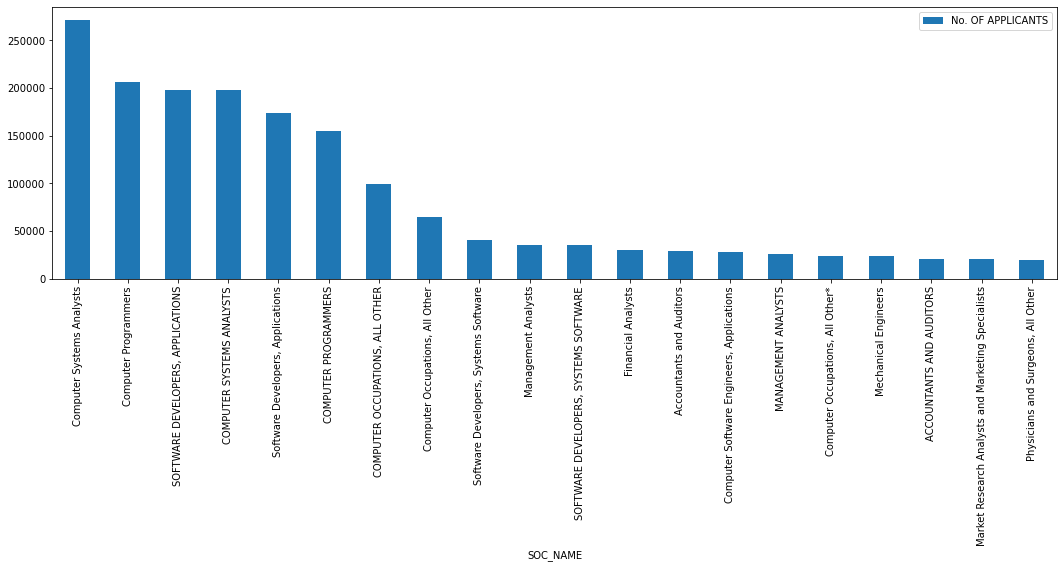

In [16]:
Pie.plot(kind='bar',x='SOC_NAME',y='No. OF APPLICANTS',figsize=(18,5))

In [17]:
Pie=df["JOB_TITLE"].value_counts().to_frame()[:20]
Pie.reset_index(inplace=True)
Pie.columns = ["JOB_TITLE","No. OF APPLICANTS"]
print(Pie)

                      JOB_TITLE  No. OF APPLICANTS
0            PROGRAMMER ANALYST             226313
1             SOFTWARE ENGINEER             105315
2           COMPUTER PROGRAMMER              65399
3               SYSTEMS ANALYST              56652
4            SOFTWARE DEVELOPER              38745
5              BUSINESS ANALYST              35996
6      COMPUTER SYSTEMS ANALYST              32206
7          TECHNOLOGY LEAD - US              28312
8       TECHNOLOGY ANALYST - US              26013
9      SENIOR SOFTWARE ENGINEER              24109
10            SENIOR CONSULTANT              23426
11                   CONSULTANT              21765
12          ASSISTANT PROFESSOR              20884
13           PHYSICAL THERAPIST              18373
14              PROJECT MANAGER              18291
15       DATABASE ADMINISTRATOR              15234
16                   ACCOUNTANT              13170
17                    DEVELOPER              12459
18  COMPUTER PROGRAMMER ANALYST

<AxesSubplot:xlabel='JOB_TITLE'>

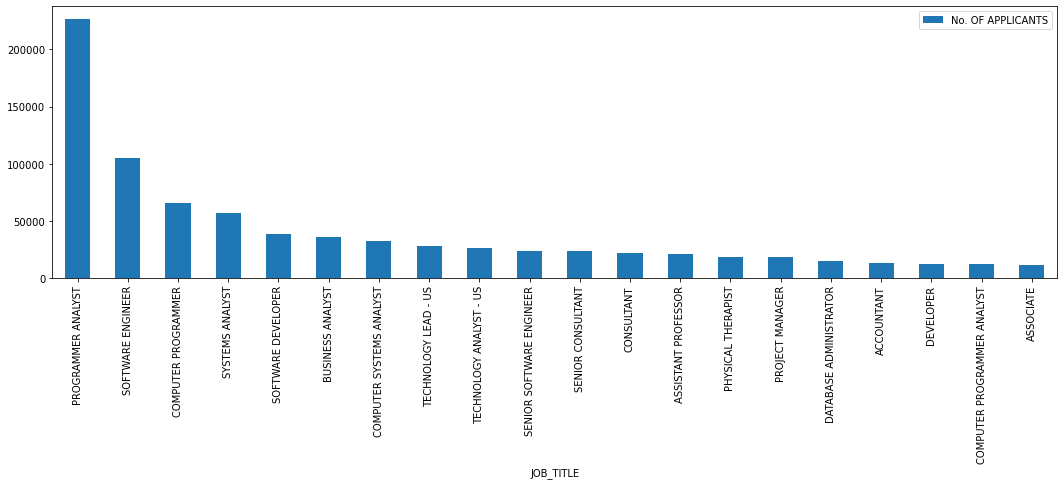

In [18]:
Pie.plot(kind='bar',x='JOB_TITLE',y='No. OF APPLICANTS',figsize=(18,5))

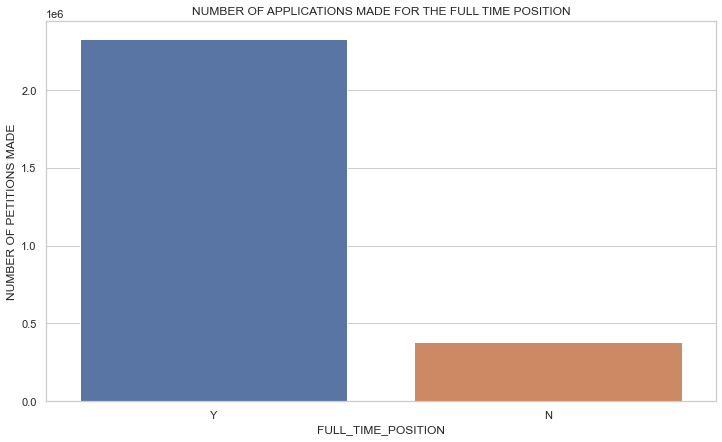

In [19]:
plt.figure(figsize=(12,7))
sns.set(style="whitegrid")
g = sns.countplot(x = 'FULL_TIME_POSITION', data = df)
plt.title("NUMBER OF APPLICATIONS MADE FOR THE FULL TIME POSITION")
plt.ylabel("NUMBER OF PETITIONS MADE")
plt.show()

In [20]:
df.columns

Index(['Unnamed: 0', 'CASE_STATUS', 'EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE',
       'FULL_TIME_POSITION', 'PREVAILING_WAGE', 'YEAR', 'WORKSITE', 'lon',
       'lat'],
      dtype='object')

In [21]:
df.PREVAILING_WAGE.mean()

148152.29986513025

In [22]:
df.PREVAILING_WAGE.mode()

0    60000.0
dtype: float64

In [23]:
Pie=df["WORKSITE"].value_counts().to_frame()[:20]
Pie.reset_index(inplace=True)
Pie.columns = ["WORKSITE","No. OF APPLICANTS"]
print(Pie)

                      WORKSITE  No. OF APPLICANTS
0           NEW YORK, NEW YORK             171633
1               HOUSTON, TEXAS              74136
2    SAN FRANCISCO, CALIFORNIA              56095
3             ATLANTA, GEORGIA              47916
4            CHICAGO, ILLINOIS              46763
5         SAN JOSE, CALIFORNIA              45368
6        SUNNYVALE, CALIFORNIA              30805
7                DALLAS, TEXAS              28659
8    CHARLOTTE, NORTH CAROLINA              28412
9        BOSTON, MASSACHUSETTS              27782
10         REDMOND, WASHINGTON              27631
11               IRVING, TEXAS              26344
12     JERSEY CITY, NEW JERSEY              25039
13     SANTA CLARA, CALIFORNIA              24815
14       SAN DIEGO, CALIFORNIA              24812
15         SEATTLE, WASHINGTON              24482
16     LOS ANGELES, CALIFORNIA              24378
17   MOUNTAIN VIEW, CALIFORNIA              24205
18               AUSTIN, TEXAS              23947


<AxesSubplot:xlabel='WORKSITE'>

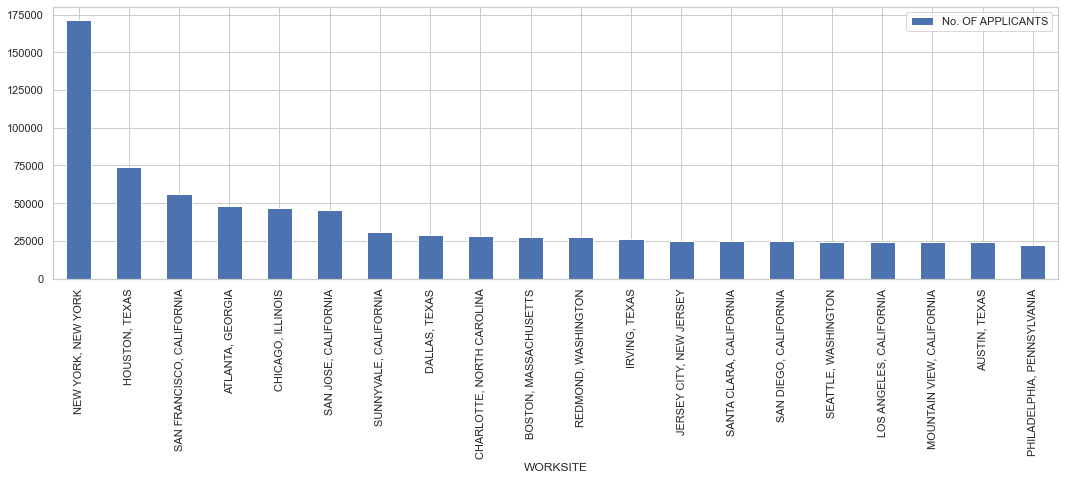

In [24]:
Pie.plot(kind='bar',x='WORKSITE',y='No. OF APPLICANTS',figsize=(18,5))

In [25]:
df.shape

(2709982, 11)

In [26]:
df.isna().any()

Unnamed: 0            False
CASE_STATUS            True
EMPLOYER_NAME          True
SOC_NAME               True
JOB_TITLE              True
FULL_TIME_POSITION     True
PREVAILING_WAGE        True
YEAR                   True
WORKSITE              False
lon                    True
lat                    True
dtype: bool

In [27]:
df.isna().sum()

Unnamed: 0                0
CASE_STATUS              13
EMPLOYER_NAME            31
SOC_NAME              15906
JOB_TITLE                23
FULL_TIME_POSITION       14
PREVAILING_WAGE          66
YEAR                     13
WORKSITE                  0
lon                   97071
lat                   97071
dtype: int64

In [28]:
df['EMPLOYER_NAME'].mode()[0]

'INFOSYS LIMITED'

In [29]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].fillna(df['EMPLOYER_NAME'].mode()[0])

In [30]:
df['SOC_NAME'] = df['SOC_NAME'].fillna(df['SOC_NAME'].mode()[0])
df['JOB_TITLE'] = df['JOB_TITLE'].fillna(df['JOB_TITLE'].mode()[0])
df['FULL_TIME_POSITION'] = df['FULL_TIME_POSITION'].fillna(df['FULL_TIME_POSITION'].mode()[0])
df['PREVAILING_WAGE'] = df['PREVAILING_WAGE'].fillna(df['PREVAILING_WAGE'].mode()[0])

In [31]:
df = df.drop('lat', axis = 1)
df = df.drop('lon', axis = 1)

In [32]:
df.isna().sum()

Unnamed: 0             0
CASE_STATUS           13
EMPLOYER_NAME          0
SOC_NAME               0
JOB_TITLE              0
FULL_TIME_POSITION     0
PREVAILING_WAGE        0
YEAR                  13
WORKSITE               0
dtype: int64

In [33]:
df.dtypes

Unnamed: 0              int64
CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
dtype: object

In [34]:
df.columns=['SERIAL_NUMBER','CASE_STATUS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','WORKSITE']
df = df.drop('SERIAL_NUMBER', axis = 1)

In [35]:
df.dtypes

CASE_STATUS            object
EMPLOYER_NAME          object
SOC_NAME               object
JOB_TITLE              object
FULL_TIME_POSITION     object
PREVAILING_WAGE       float64
YEAR                  float64
WORKSITE               object
dtype: object

In [36]:
CASE_STATUS = 'to_be_predicted'
EMPLOYER_NAME = input("Enter employer name : ")
SOC_NAME = input("Enter soc name : ")
JOB_TITLE = input("Enter job title : ")
FULL_TIME_POSITION = input("Enter Y if you are full timer otherwise enter N : ")
PREVAILING_WAGE = float(input("Enter your prevailing wage : "))
YEAR = int(input("Enter year of applying : "))
WORKSITE = input("Enter your worksite : ")

Enter employer name : Infosys limited
Enter soc name : computer programmar
Enter job title : programmar
Enter Y if you are full timer otherwise enter N : Y
Enter your prevailing wage : 15123.03
Enter year of applying : 2020
Enter your worksite : New York


In [37]:
l = [[CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE]]

In [38]:
l

[['to_be_predicted',
  'Infosys limited',
  'computer programmar',
  'programmar',
  'Y',
  15123.03,
  2020,
  'New York']]

In [39]:
df2 = pd.DataFrame(l,columns = ['CASE_STATUS','EMPLOYER_NAME','SOC_NAME','JOB_TITLE','FULL_TIME_POSITION','PREVAILING_WAGE','YEAR','WORKSITE'])
df2

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,to_be_predicted,Infosys limited,computer programmar,programmar,Y,15123.03,2020,New York


In [40]:
df = df.append(df2, ignore_index=True)

In [41]:
df.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
2709978,NaN,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,60000.00,NaN,"SOUTH LAKE, TEXAS"
2709979,NaN,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,60000.00,NaN,"CLINTON, NEW JERSEY"
2709980,NaN,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,60000.00,NaN,"OWINGS MILL, MARYLAND"
2709981,NaN,INFOSYS LIMITED,Computer Systems Analysts,PROGRAMMER ANALYST,Y,60000.00,NaN,"ALTANTA, GEORGIA"
2709982,to_be_predicted,Infosys limited,computer programmar,programmar,Y,15123.03,2020.0,New York


In [42]:
df.shape

(2709983, 8)

In [43]:
df.dropna(inplace=True)

In [44]:
df.shape

(2709970, 8)

In [45]:
df.tail()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
2709965,DENIED,"KEVIN PARK & ASSOCIATES, LTD",Accountants and Auditors,ACCOUNTANT,Y,45760.00,2011.0,"ARLINGTON HEIGHTS, ILLINOIS"
2709966,DENIED,IVERTIX INCORPORATED,Computer Programmers,APPLICATION DEVELOPER,Y,54080.00,2011.0,"WASHINGTON, DISTRICT OF COLUMBIA"
2709967,DENIED,"PROGRESSIVE SURFACE, INC.",Sales Engineers,SALES ENGINEER,Y,55141.00,2011.0,"GRAND RAPIDS, MICHIGAN"
2709968,DENIED,PEI PARTNERSHIP ARCHITECTS LLP,Architectural and Civil Drafters,ARCHITECTURAL DESIGNER,Y,69368.00,2011.0,"NEW YORK, NEW YORK"
2709982,to_be_predicted,Infosys limited,computer programmar,programmar,Y,15123.03,2020.0,New York


In [46]:
df.isna().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
WORKSITE              0
dtype: int64

<AxesSubplot:>

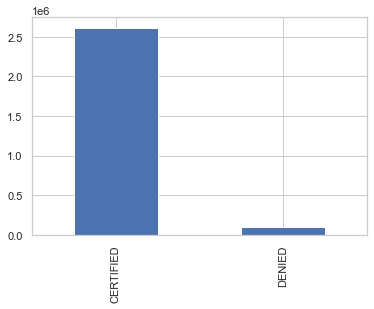

In [47]:
df["CASE_STATUS"].value_counts().loc[lambda x:x>1].plot(kind='bar')

In [48]:
df['EMPLOYER_NAME'] = df['EMPLOYER_NAME'].str.lower()
df['SOC_NAME'] = df['SOC_NAME'].str.lower()
df['JOB_TITLE'] = df['JOB_TITLE'].str.lower()
df['WORKSITE'] = df['WORKSITE'].str.lower()

In [49]:
df.head(10)

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE
0,CERTIFIED,quicklogix llc,chief executives,ceo,Y,187200.00,2016.0,"santa clara, california"
1,CERTIFIED,"mcchrystal group, llc",chief executives,"president, northeast region",Y,241842.00,2016.0,"alexandria, virginia"
2,CERTIFIED,"lomics, llc",chief executives,ceo,Y,99986.00,2016.0,"san diego, california"
3,CERTIFIED,uc university high school education inc.,chief executives,chief financial officer,Y,99986.00,2016.0,"chula vista, california"
4,CERTIFIED,"quicklogix, inc.",chief executives,ceo,Y,187200.00,2016.0,"santa clara, california"
5,CERTIFIED,hello inc.,chief executives,chief business officer,Y,215862.00,2016.0,"san francisco, california"
6,CERTIFIED,umbel corp,chief executives,vice president of engineering,Y,192088.00,2016.0,"austin, texas"
7,CERTIFIED,"perspectives of freedom foundation, inc",chief executives,executive director,Y,95295.98,2016.0,"weston, florida"
8,CERTIFIED,gth inc.,chief executives,"vice president, business development",Y,149594.00,2016.0,"washington, district of columbia"
9,CERTIFIED,the kraft heinz company,chief executives,head of us sales,Y,226699.00,2016.0,"chicago, illinois"


In [50]:
df['SOC_NAME'].value_counts()

computer systems analysts                             485193
software developers, applications                     372124
computer programmers                                  360575
computer occupations, all other                       164659
software developers, systems software                  75806
                                                       ...  
flight attendants                                          1
sales representatives, wholesale and manufact              1
foreign language & literature teachers, postsecond         1
licensing examiners and inspectors                         1
wind energy engineers                                      1
Name: SOC_NAME, Length: 1517, dtype: int64

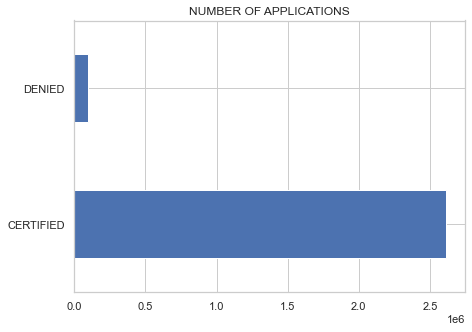

In [51]:
plt.figure(figsize=(7,5))
df.CASE_STATUS.value_counts().loc[lambda x:x>1].plot(kind='barh')
df.sort_values('CASE_STATUS')
plt.title("NUMBER OF APPLICATIONS")
plt.show()

<AxesSubplot:>

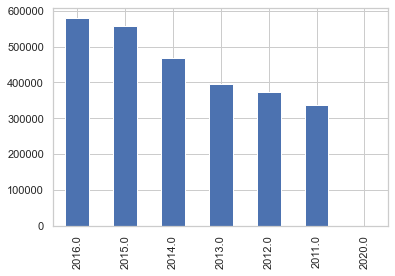

In [52]:
df.YEAR.value_counts().plot(kind = 'bar')

In [53]:
s=pd.crosstab(df.CASE_STATUS, df.SOC_NAME,margins=True)
print(s)
s=s/s.loc['All']
print('***PERCENTAGE**')
print(s)

SOC_NAME         13-2011.01  15-1121  15-1132  15-1199.01  17-2051  27-3031  \
CASE_STATUS                                                                   
CERTIFIED                 1        1        1           1        1        1   
DENIED                    0        0        0           0        0        0   
to_be_predicted           0        0        0           0        0        0   
All                       1        1        1           1        1        1   

SOC_NAME         <font><font>carpinteros</font></font>  able seamen  \
CASE_STATUS                                                           
CERTIFIED                                            0            1   
DENIED                                               1            1   
to_be_predicted                                      0            0   
All                                                  1            2   

SOC_NAME         accountant  accountants  ...  \
CASE_STATUS                               ...   


In [54]:
df['state'] = df.WORKSITE.str.split('\s+').str[-1]

In [55]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,WORKSITE,state
0,CERTIFIED,quicklogix llc,chief executives,ceo,Y,187200.0,2016.0,"santa clara, california",california
1,CERTIFIED,"mcchrystal group, llc",chief executives,"president, northeast region",Y,241842.0,2016.0,"alexandria, virginia",virginia
2,CERTIFIED,"lomics, llc",chief executives,ceo,Y,99986.0,2016.0,"san diego, california",california
3,CERTIFIED,uc university high school education inc.,chief executives,chief financial officer,Y,99986.0,2016.0,"chula vista, california",california
4,CERTIFIED,"quicklogix, inc.",chief executives,ceo,Y,187200.0,2016.0,"santa clara, california",california


In [56]:
df = df.drop('WORKSITE', axis = 1)

In [57]:
df.head()

,CASE_STATUS,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,state
0,CERTIFIED,quicklogix llc,chief executives,ceo,Y,187200.0,2016.0,california
1,CERTIFIED,"mcchrystal group, llc",chief executives,"president, northeast region",Y,241842.0,2016.0,virginia
2,CERTIFIED,"lomics, llc",chief executives,ceo,Y,99986.0,2016.0,california
3,CERTIFIED,uc university high school education inc.,chief executives,chief financial officer,Y,99986.0,2016.0,california
4,CERTIFIED,"quicklogix, inc.",chief executives,ceo,Y,187200.0,2016.0,california


In [58]:
mode = df.loc[df['PREVAILING_WAGE']<150000, 'PREVAILING_WAGE'].mode()[0]
df.loc[df.PREVAILING_WAGE > 150000, 'PREVAILING_WAGE'] = np.nan
df.fillna(mode,inplace=True)

<AxesSubplot:>

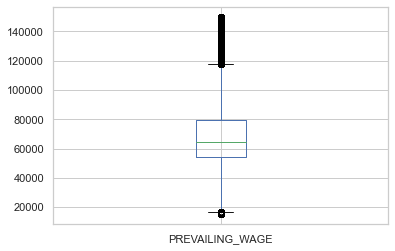

In [59]:
mode = df.loc[df['PREVAILING_WAGE']>15000, 'PREVAILING_WAGE'].mode()[0]
df.loc[df.PREVAILING_WAGE < 15000, 'PREVAILING_WAGE'] = np.nan
df.fillna(mode,inplace=True)
df["PREVAILING_WAGE"].plot(kind="box")

In [60]:
df.isna().sum()

CASE_STATUS           0
EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
state                 0
dtype: int64

# Bivariate Analysis

In [61]:
Pie=df["EMPLOYER_NAME"].value_counts().to_frame()[:20]
Pie.reset_index(inplace=True)
Pie.columns = ["EMPLOYER_NAME","No. OF APPLICANTS"]
s1 = pd.merge(df, Pie, how='inner', on=['EMPLOYER_NAME'])

In [62]:
s2=s1.groupby(["EMPLOYER_NAME"]).mean()
s2.reset_index(inplace=True)
s2[['EMPLOYER_NAME','PREVAILING_WAGE','No. OF APPLICANTS']]

,EMPLOYER_NAME,PREVAILING_WAGE,No. OF APPLICANTS
0,accenture llp,73243.591638,32983
1,amazon corporate llc,88005.490225,8235
2,apple inc.,107128.089145,6819
3,capgemini america inc,79349.092877,16032
4,cognizant technology solutions u.s. corporation,70132.380709,15448
5,deloitte & touche llp,59482.448256,9603
6,deloitte consulting llp,73427.325715,36667
7,ernst & young u.s. llp,69692.718549,18217
8,google inc.,99504.805277,12545
9,"hcl america, inc.",69779.483789,22330


<AxesSubplot:xlabel='EMPLOYER_NAME'>

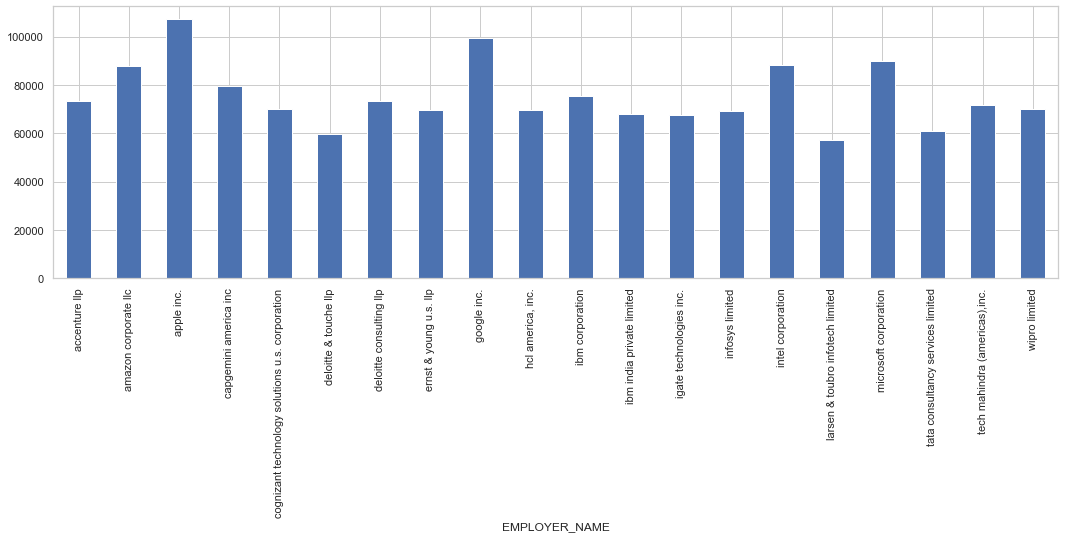

In [63]:
s1.groupby(["EMPLOYER_NAME"]).PREVAILING_WAGE.mean().plot(kind='bar',x='EMPLOYER_NAME',y='PREVAILING_WAGE',figsize=(18,5))

In [64]:
Pie=df["SOC_NAME"].value_counts().to_frame()[:20]
Pie.reset_index(inplace=True)
Pie.columns = ["SOC_NAME","No. OF APPLICANTS"]
s1 = pd.merge(df, Pie, how='inner', on=['SOC_NAME'])
s2=s1.groupby(["SOC_NAME"]).mean()
s2.reset_index(inplace=True)
s2[['SOC_NAME','PREVAILING_WAGE','No. OF APPLICANTS']]

,SOC_NAME,PREVAILING_WAGE,No. OF APPLICANTS
0,accountants and auditors,56128.344108,49780
1,computer and information systems managers,99640.771134,25140
2,"computer occupations, all other",68619.147511,164659
3,"computer occupations, all other*",64486.234872,24545
4,computer programmers,60416.882406,360575
5,"computer software engineers, applications",78635.622632,28189
6,computer systems analysts,68191.434205,485193
7,database administrators,67203.615349,35303
8,electrical engineers,78432.030860,30159
9,"electronics engineers, except computer",86076.768200,31782


<AxesSubplot:xlabel='SOC_NAME'>

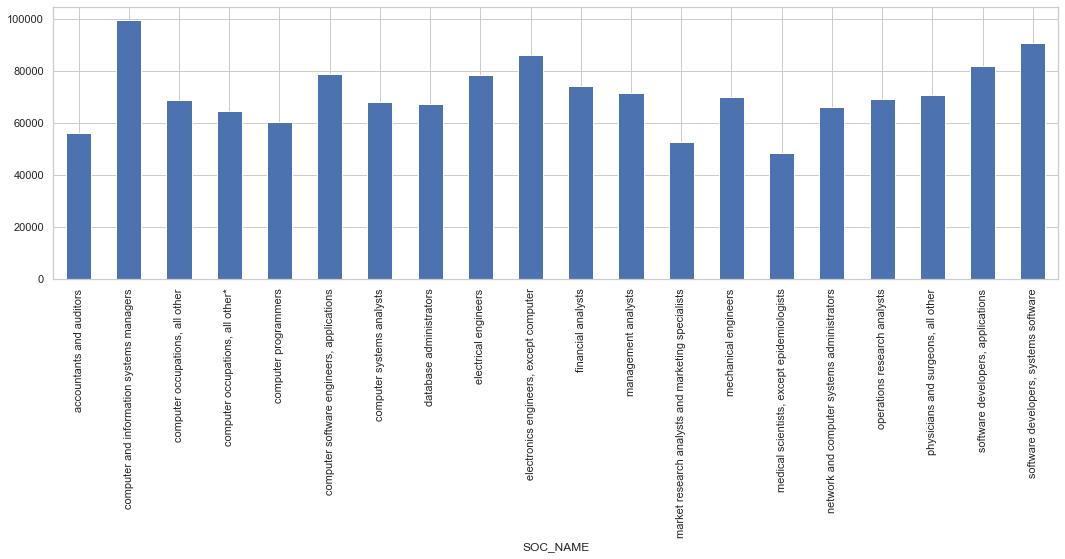

In [65]:
s1.groupby(["SOC_NAME"]).PREVAILING_WAGE.mean().plot(kind='bar',x='SOC_NAME',y='PREVAILING_WAGE',figsize=(18,5))

# PRE-PROCESSING

In [66]:
from sklearn import preprocessing
def Encoder(df):
          columnsToEncode = list(df.select_dtypes(include=['category','object']))
          le = preprocessing.LabelEncoder()
          for feature in columnsToEncode:
              try:
                  df[feature] = le.fit_transform(df[feature])
              except:
                  print('Error encoding '+feature)
          return df
df = Encoder(df)

In [67]:
y = df['CASE_STATUS']

In [68]:
x_to_pred = df.loc[[929921], : ]

In [69]:
x_to_pred = x_to_pred.drop('CASE_STATUS',axis=1)
x_to_pred

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,state
929921,110692,263,55987,1,60528.0,2015.0,4


In [70]:
y

0          0
1          0
2          0
3          0
4          0
          ..
2709965    1
2709966    1
2709967    1
2709968    1
2709982    2
Name: CASE_STATUS, Length: 2709970, dtype: int32

In [71]:
X = df.drop('CASE_STATUS', axis=1)

In [72]:
X.head()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,state
0,166288,174,40035,1,60000.0,2016.0,4
1,128943,174,158791,1,60000.0,2016.0,45
2,122252,174,40035,1,99986.0,2016.0,4
3,213416,174,41299,1,99986.0,2016.0,4
4,166289,174,40035,1,60000.0,2016.0,4


In [73]:
X.corr()

,EMPLOYER_NAME,SOC_NAME,JOB_TITLE,FULL_TIME_POSITION,PREVAILING_WAGE,YEAR,state
EMPLOYER_NAME,1.000000,-0.025058,-0.014653,-0.015807,-0.077136,-0.019203,-0.004318
SOC_NAME,-0.025058,1.000000,0.154091,0.024878,0.210245,0.064384,-0.008246
JOB_TITLE,-0.014653,0.154091,1.000000,0.054961,0.118184,0.030314,-0.044998
FULL_TIME_POSITION,-0.015807,0.024878,0.054961,1.000000,0.217825,-0.384190,-0.032818
PREVAILING_WAGE,-0.077136,0.210245,0.118184,0.217825,1.000000,0.117136,-0.087055
YEAR,-0.019203,0.064384,0.030314,-0.384190,0.117136,1.000000,-0.007105
state,-0.004318,-0.008246,-0.044998,-0.032818,-0.087055,-0.007105,1.000000


<AxesSubplot:>

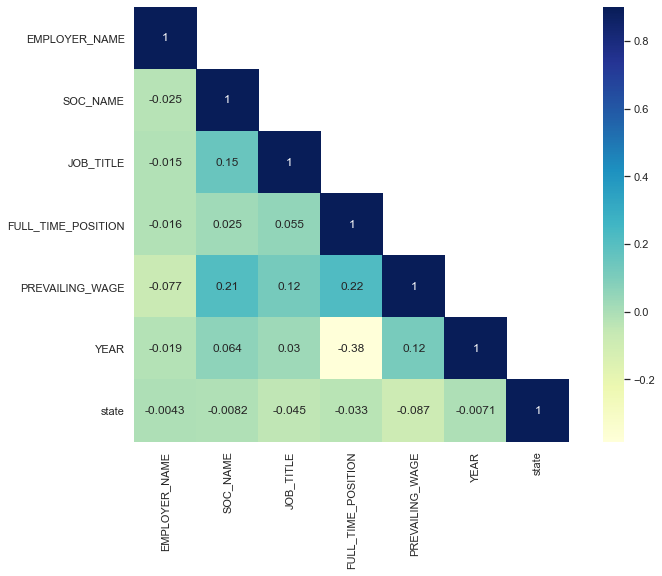

In [74]:
corr = X.corr()
mask = np.array(corr)
mask[np.tril_indices_from(mask)] = False
fig,ax= plt.subplots()
fig.set_size_inches(12,8)
sns.heatmap(corr, mask=mask,vmax=.9, square=True,annot=True, cmap="YlGnBu")

In [75]:
y.value_counts().loc[lambda x:x>1]    #.plot(kind="barh")
#plt.title("NUMBER OF APPLICATIONS")
#plt.show()

0    2615623
1      94346
Name: CASE_STATUS, dtype: int64

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.40, random_state=10)
X_train.columns

Index(['EMPLOYER_NAME', 'SOC_NAME', 'JOB_TITLE', 'FULL_TIME_POSITION',
       'PREVAILING_WAGE', 'YEAR', 'state'],
      dtype='object')

In [77]:
print(X_train.isnull().sum())

EMPLOYER_NAME         0
SOC_NAME              0
JOB_TITLE             0
FULL_TIME_POSITION    0
PREVAILING_WAGE       0
YEAR                  0
state                 0
dtype: int64


# ONE-HOT ENCODING

In [78]:
from sklearn.preprocessing import OneHotEncoder
X_train_encode = pd.get_dummies(X_train)
X_test_encode = pd.get_dummies(X_test)
x_to_pred_encode = pd.get_dummies(x_to_pred)

# LOGISTIC REGRESSION MODEL

In [79]:
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
print("*Logistic Regression Model*")
LogReg = LogisticRegression()
LogReg.fit(X_train_encode, y_train)
y_pred = LogReg.predict(X_test_encode)
print(y_pred)

*Logistic Regression Model*
[0 0 0 ... 0 0 0]


In [80]:
import joblib
joblib.dump(LogReg,"logreg.save")

['logreg.save']

In [81]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1046189,       0],
       [  37799,       0]], dtype=int64)

In [82]:
print(classification_report(y_test, y_pred))

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98   1046189
           1       0.00      0.00      0.00     37799

    accuracy                           0.97   1083988
   macro avg       0.48      0.50      0.49   1083988
weighted avg       0.93      0.97      0.95   1083988



D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [83]:
y_predict = LogReg.predict(x_to_pred_encode)
print(y_predict)

[0]


In [84]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

array([[1046189,       0],
       [  37799,       0]], dtype=int64)

In [85]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


              precision    recall  f1-score   support

           0       0.97      1.00      0.98   1046189
           1       0.00      0.00      0.00     37799

    accuracy                           0.97   1083988
   macro avg       0.48      0.50      0.49   1083988
weighted avg       0.93      0.97      0.95   1083988



D:\Programs\Anaconda\lib\site-packages\sklearn\metrics\_classification.py:1245: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [86]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred)

0.9651296877825216

# DECISION TREE MODEL

In [87]:
from sklearn import tree
from sklearn.metrics import roc_curve, roc_auc_score
from matplotlib import pyplot as plt

model = tree.DecisionTreeClassifier()
model.fit(X_train_encode, y_train)
predictions = model.predict_proba(X_test_encode)
y_pred_dt = model.predict(X_test_encode) 
print(y_pred_dt)

[0 0 0 ... 0 0 1]


In [88]:

from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_dt)
confusion_matrix

array([[1015311,   30878],
       [  32546,    5253]], dtype=int64)

In [89]:
print(classification_report(y_test, y_pred_dt))

              precision    recall  f1-score   support

           0       0.97      0.97      0.97   1046189
           1       0.15      0.14      0.14     37799

    accuracy                           0.94   1083988
   macro avg       0.56      0.55      0.56   1083988
weighted avg       0.94      0.94      0.94   1083988



In [90]:
from sklearn.metrics import accuracy_score
accuracy_score(y_test,y_pred_dt)

0.94149012719698

In [91]:
y_pred_dt = model.predict(x_to_pred_encode) 

In [92]:
y_pred_dt

array([0])

# OUTPUT OF LOGISTIC REGRESSION

In [93]:
if(y_predict==0):
    print("certified")
else:
    print("denied")

certified


# OUTPUT OF DECISION TREE

In [94]:
if(y_pred_dt==0):
    print("certified")
else:
    print("denied")

certified
